# Climate Change media coverage

This is my attempt to make some insightful figures with open-source data from the [Media and Climate Change Observatory](http://sciencepolicy.colorado.edu/icecaps/research/media_coverage/index.html).

Personally I found this a very intriguing dataset, covering something highly original. Aided by very in depth monthly and annual reports. Data is monthly resolution. 

Citation for the data is: 

Boykoff, M., Aoyagi, M., Ballantyne, A.G., Benham, A., Chandler, P., Daly, M., Doi, K., Fernández-Reyes, R., Hawley, E., Jiménez Gómez, I., Lyytimäki, J., McAllister, L., McNatt, M., Mervaala, E., Mocatta, G., Nacu-Schmidt, A., Oonk, D., Osborne-Gowey, J., Pearman, O., Petersen, L.K., Simonsen, A.H., and Ytterstad, A. (2022). World Newspaper Coverage of Climate Change or Global Warming, 2004-2022. Media and Climate Change Observatory Data Sets. Cooperative Institute for Research in Environmental Sciences, University of Colorado. doi.org/10.25810/4c3b-b819.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First step is to wrangle the data. I found it pretty challenging to manipulate the spreadsheet into a dataframe optimal for plotting. Biggest issue was the the time index. The solution I ended up with is below. 

Data is manually downloaded, using the 'World Newspaper Coverage of Climate Change or Global Warming, 2002-2022 - May 2022' dataset, downloaded from [this link](https://scholar.colorado.edu/concern/datasets/r781wh276).

Things to add:
- automate data download
- rename index
- calculate new columns for 'Articles per source' as plotted on MeCCO website


In [2]:
df = pd.read_csv('media_data.csv', skiprows = [0,1], index_col = 'Newspaper')

df = df.T
df = df['TOTAL']
dbs = df.loc['Database'].astype("string")
df.columns = dbs
df = df.iloc[1:len(df)]
dates = pd.date_range(start = '1/1/2004', end = '1/12/2023', freq = 'M')
df = df.set_index(dates)
df['World'] = df.sum(axis = 1)


In [3]:
df.head(10)

Database,Asia,Middle East,Europe,North America,Central/South America,Africa,Oceania,International Wire Services,World
2004-01-31,250.0,0.0,315.0,125.0,0.0,0.0,125.0,72.0,887.0
2004-02-29,228.0,1.0,338.0,114.0,0.0,0.0,128.0,106.0,915.0
2004-03-31,220.0,2.0,346.0,142.0,3.0,0.0,128.0,131.0,972.0
2004-04-30,199.0,1.0,291.0,130.0,0.0,0.0,116.0,88.0,825.0
2004-05-31,240.0,1.0,470.0,183.0,2.0,0.0,184.0,131.0,1211.0
2004-06-30,343.0,6.0,431.0,214.0,0.0,0.0,282.0,168.0,1444.0
2004-07-31,206.0,2.0,356.0,130.0,0.0,0.0,152.0,103.0,949.0
2004-08-31,284.0,3.0,397.0,157.0,1.0,0.0,134.0,83.0,1059.0
2004-09-30,274.0,1.0,414.0,155.0,3.0,0.0,163.0,179.0,1189.0
2004-10-31,385.0,0.0,494.0,198.0,2.0,0.0,188.0,210.0,1477.0


Next step is to make some exploratory plots of the raw data.

Things to add:
- use a loop to shorten code

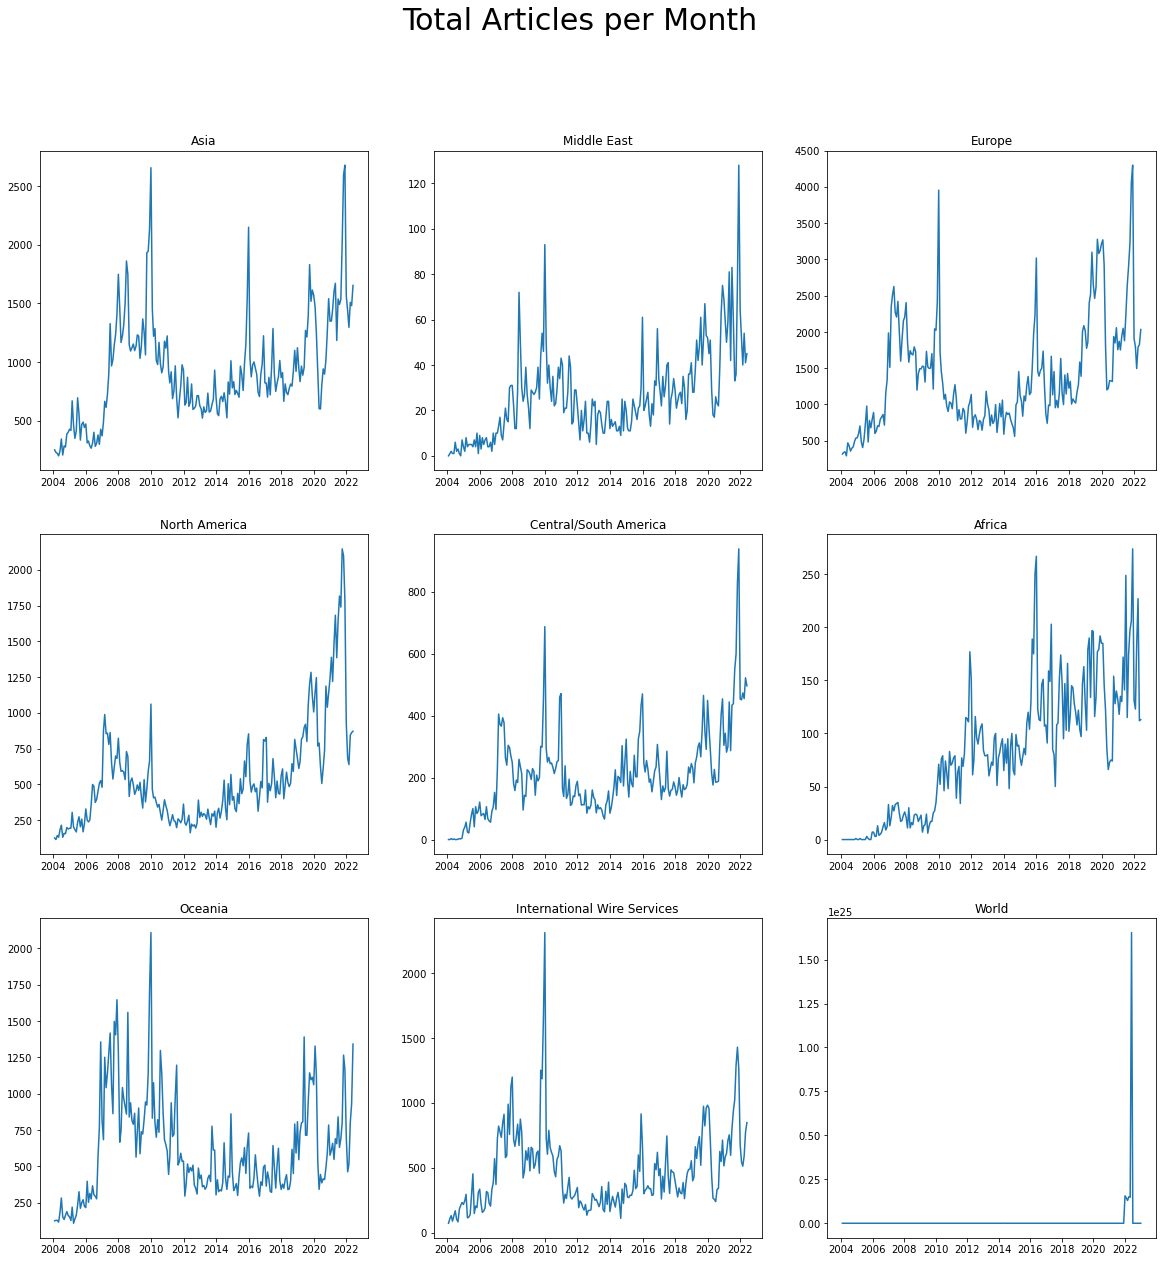

In [9]:
fig = plt.figure(figsize = (20 , 20))
ax_array = fig.subplots( 3 , 3 )
fig.suptitle('Total Articles per Month', fontsize = 30)
fig.patch.set_facecolor('white')

#xticks = [2004:1:1, 2008, 2012, 2016, 2020:1:1]

ax_array[0,0].plot(df['Asia'])
ax_array[0,0].set_title('Asia')
#ax_array[0,0].set_xticks(xticks)

ax_array[0,1].plot(df['Middle East'])
ax_array[0,1].set_title('Middle East')

ax_array[0,2].plot(df['Europe'])
ax_array[0,2].set_title('Europe')

ax_array[1,0].plot(df['North America'])
ax_array[1,0].set_title('North America')

ax_array[1,1].plot(df['Central/South America'])
ax_array[1,1].set_title('Central/South America')

ax_array[1,2].plot(df['Africa'])
ax_array[1,2].set_title('Africa')

ax_array[2,0].plot(df['Oceania'])
ax_array[2,0].set_title('Oceania')

ax_array[2,1].plot(df['International Wire Services'])
ax_array[2,1].set_title('International Wire Services')

ax_array[2,2].plot(df['World'])
ax_array[2,2].set_title('World')

plt.savefig('Media Figure 1.png', bbox_inches='tight', pad_inches=0.5)


This flags up an issue with the 'World' total data column I calculated my self. Contains very large values (incorrect calculation). Preliminary attempts to get to the bottom of this are below. 

In [5]:
max(df['World'])

1.6534520338714962e+25

In [6]:
df['World'].idxmax()

Timestamp('2022-05-31 00:00:00', freq='M')

In [7]:
df.loc[df['World'].idxmax()]

Database
Asia                                                   1653
Middle East                                              45
Europe                                                 2033
North America                                           871
Central/South America                                   496
Africa                                                  113
Oceania                                                1341
International Wire Services                             848
World                          16534520338714961681317888.0
Name: 2022-05-31 00:00:00, dtype: object